# Project: Predicting Customer Happiness from Survey Responses

## Objective:
#### Predict whether a customer is happy (Y=1) or unhappy (Y=0) using responses to 6 survey questions (X1 to X6). Each response is rated 1–5.

## Import library

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HappySurvey2020.csv')

## 1 Overview of the data 

In [3]:
# Preview data structure
print("Shape:", df.shape)
display(df.head())

Shape: (126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)


Missing values:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64
Y     0.0
X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
dtype: float64


In [5]:
# Check data types and value ranges
print("\nData types:")
print(df.dtypes)


Data types:
Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


In [6]:
# Describe statistical summary
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Quick look
127 rows 7 columns
// no missing value

### 2. Checking data balance 



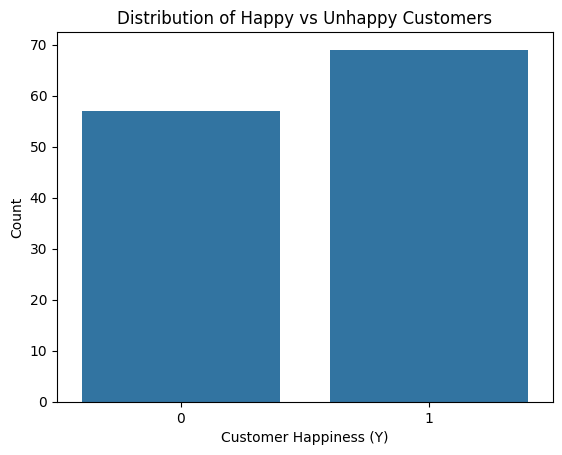

Y
1    54.761905
0    45.238095
Name: proportion, dtype: float64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variable
sns.countplot(x='Y', data=df)
plt.title('Distribution of Happy vs Unhappy Customers')
plt.xlabel('Customer Happiness (Y)')
plt.ylabel('Count')
plt.show()

# Check proportions
df['Y'].value_counts(normalize=True)

df['Y'].value_counts(normalize=True) * 100

## 3. The distributions of each feature 

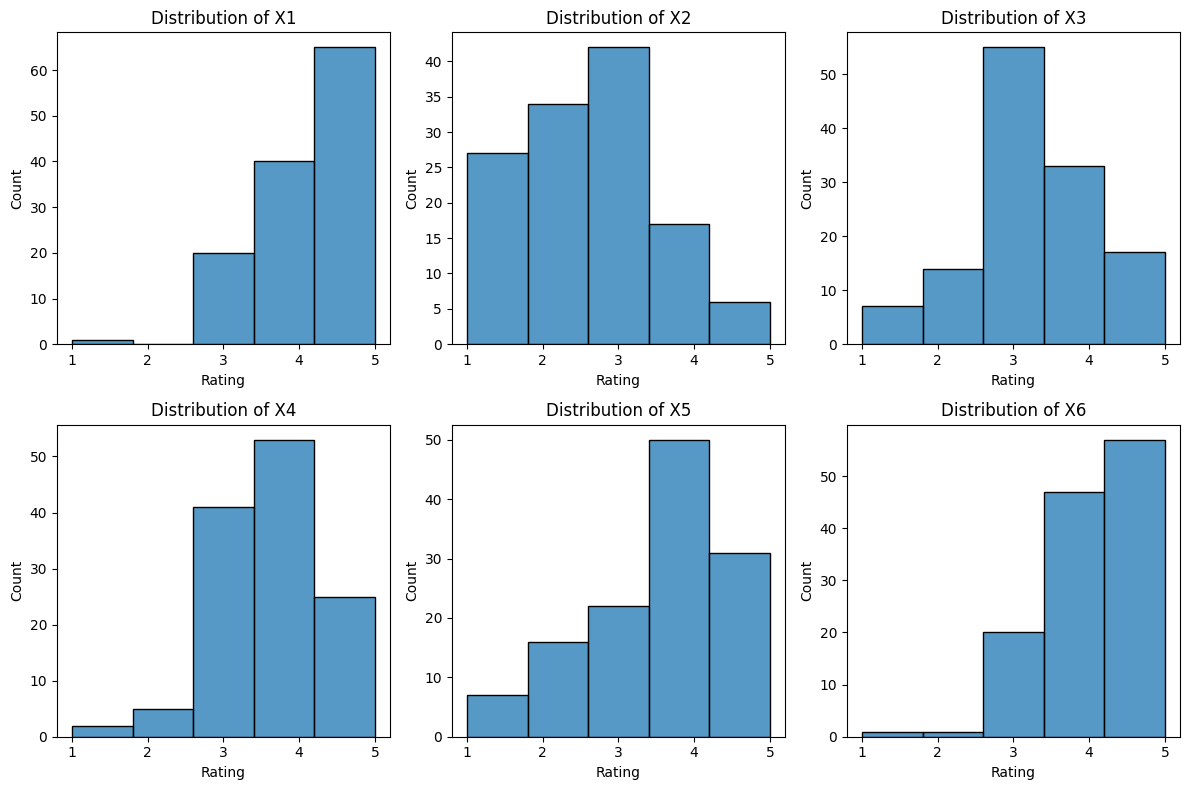

               X1          X2          X3          X4          X5          X6
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000
mean     4.333333    2.531746    3.309524    3.746032    3.650794    4.253968
std      0.800000    1.114892    1.023440    0.875776    1.147641    0.809311
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      4.000000    2.000000    3.000000    3.000000    3.000000    4.000000
50%      5.000000    3.000000    3.000000    4.000000    4.000000    4.000000
75%      5.000000    3.000000    4.000000    4.000000    4.000000    5.000000
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000


In [17]:
# Visualize Distributions of Each Feature (X1 to X6)
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
plt.figure(figsize=(12, 8))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=5, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()
print(df[feature_cols].describe())

In [12]:
from sklearn.preprocessing import StandardScaler

features = [f'X{i}' for i in range(1, 7)]
X = df[features]
y = df['Y']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
 
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("features after scaling:")
print(X_scaled_df.head())

print("statistics after scaling:")
print(X_scaled_df.describe())


features after scaling:
        X1        X2        X3        X4        X5        X6
0 -1.67332  0.421676 -0.303642  0.291150 -1.444166 -0.315061
1 -1.67332 -0.478852 -0.303642  1.437552  0.305497 -1.555612
2  0.83666  0.421676 -0.303642 -0.855253 -0.569335  0.925491
3  0.83666  1.322205 -0.303642 -0.855253 -0.569335  0.925491
4  0.83666  1.322205 -0.303642 -0.855253 -0.569335  0.925491
statistics after scaling:
                 X1            X2            X3            X4            X5  \
count  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02   
mean   3.639064e-16  9.780536e-17  2.026598e-16 -4.758099e-17  2.643388e-17   
std    1.003992e+00  1.003992e+00  1.003992e+00  1.003992e+00  1.003992e+00   
min   -4.183300e+00 -1.379381e+00 -2.265638e+00 -3.148057e+00 -2.318997e+00   
25%   -4.183300e-01 -4.788525e-01 -3.036422e-01 -8.552526e-01 -5.693346e-01   
50%    8.366600e-01  4.216761e-01 -3.036422e-01  2.911498e-01  3.054966e-01   
75%    8.366600e-01  4.216761e-

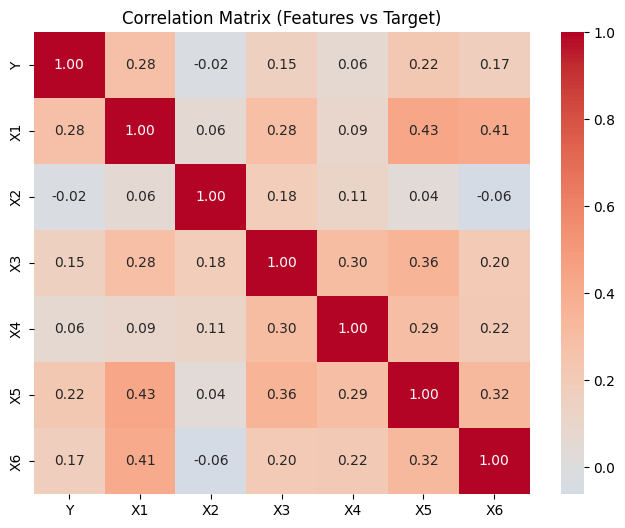

In [13]:
# Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix (Features vs Target)')
plt.show()

## 4. Train-Test split

In [18]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X = df.drop('Y', axis=1)
y = df['Y']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Output the shape of training and test data
print(f"Traning set for features: {X_train.shape}")
print(f"Testing set for features: {X_test.shape}")
print(f"Traning set for target: {y_train.shape}")
print(f"Testing set for target: {y_test.shape}")


Traning set for features: (100, 6)
Testing set for features: (26, 6)
Traning set for target: (100,)
Testing set for target: (26,)


## 5. Train and Evaluate Baseline Models

Baseline Model Performance:

Logistic Regression Accuracy: 0.62
Random Forest Accuracy: 0.65


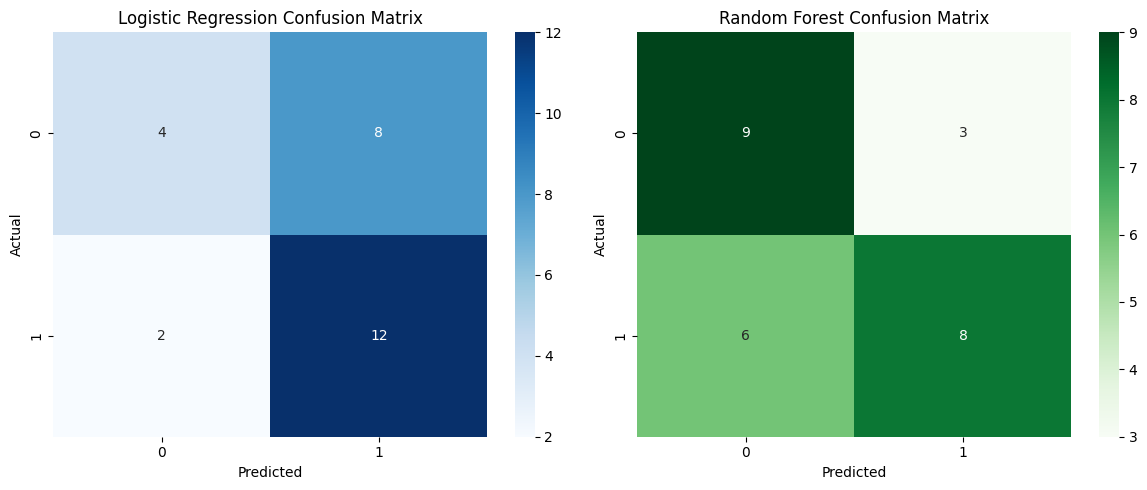

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
logreg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Fit models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate both models
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Baseline Model Performance:\n")
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Show confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### it clearly that both the models did meet the accuracy threshold 73%

so we will try to use XGBoost for better and more accurate results.

also will try to see if we can remove some questions without hurting the accuracy 

## 6. Visualizing Feature Importance
To know what drives happiness, and which survey questions are most influential.

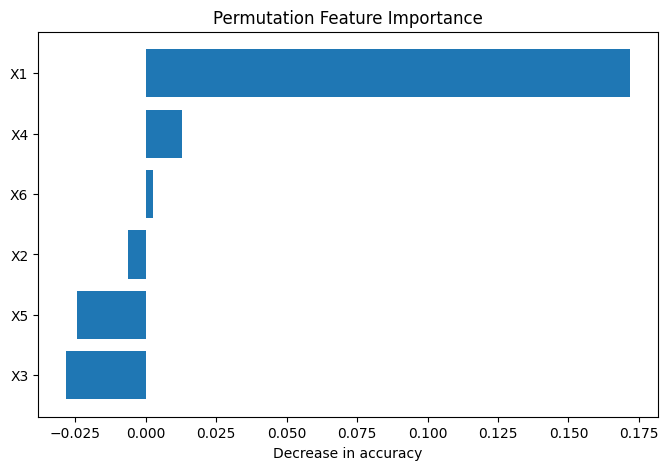

In [26]:
from sklearn.inspection import permutation_importance

# Use the validation set
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)

# Sort and plot
feature_names = X.columns
importances = perm_importance.importances_mean
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Permutation Feature Importance")
plt.xlabel("Decrease in accuracy")
plt.show()


## Insights from this plot:
X1 is by far the most important feature, with a strong positive impact on model accuracy.

X3, X5, and X4 have very minimal or neutral impact.

X2 and X6 seem to have no meaningful contribution.


**for future survays we can remove questions such as: x2 and x6, to make the survay shorter for costomers and more accurate to predect.**

In [41]:
# Reduce features based on importance
important_features = ['X1', 'X3', 'X5']
X_reduced = df[important_features]
y = df['Y']

# Split data again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train new Random Forest
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_rf_r = rf_reduced.predict(X_test_r)
acc_rf_r = accuracy_score(y_test_r, y_pred_rf_r)

print("Reduced Random Forest Accuracy:", round(acc_rf_r, 2))


Reduced Random Forest Accuracy: 0.68


### will use more powerfull model XGBoost

XGBoost Accuracy: 0.6578947368421053
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.45      0.58        20
           1       0.59      0.89      0.71        18

    accuracy                           0.66        38
   macro avg       0.71      0.67      0.65        38
weighted avg       0.71      0.66      0.64        38



C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


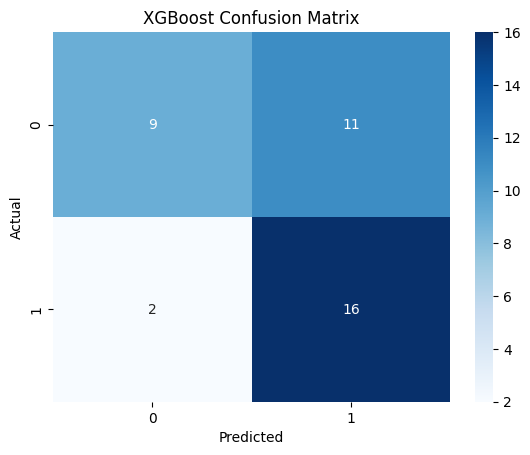

In [42]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Define model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb_model.fit(X_train_r, y_train_r)

# Predict
y_pred_xgb = xgb_model.predict(X_test_r)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test_r, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_r, y_pred_xgb))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_r, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### We have a couple of concedration to note in what cousing the models to not exceeds 65%:
1. **Small data set**, which might couse models to Overfit easily, struggle to generalize patterns,be sensitive to noise or outliers.
2. **Class impalance**: we notice that:
                                   *Class 0: High precision (0.82) but low recall (0.45) → many false negatives.*
                                   *Class 1: Lower precision (0.59) but high recall (0.89) → more false positives.*
This tells us: The model tends to overpredict Class 1 and underpredict Class 0.

3. **Limited Informative Features**: Permutation feature importance clearly showed: Only X1 has strong predictive power.
Others contribute little or even reduce accuracy when included.

This means: The dataset may lack rich, varied, or discriminative features, limiting what any ML model can learn.